In [16]:
import re
from posextract import grammatical_triples
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def count_words(clean_data):
    ngrams_dict = {}
    for ngram in clean_data:
        if ngram in ngrams_dict:
            ngrams_dict[ngram] += 1
        else:
            ngrams_dict[ngram] = 1
    return ngrams_dict


def vader_sentiment(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)

def import_and_clean_data(path, news_source):
    fname = path + news_source + '_full_article_text_12-27-2021.txt'
    replace_dict = {'\n':'', '   ':'', 'Loading...':'', 'U.S.':'United States'}
  
    file = open(fname)
    lines = [line for line in file.readlines() if line.strip()] # do i want this if statement
    file.close()
  
    out = ' '.join(lines)
  
    for k, v in replace_dict.items():
      out = out.replace(k, v)
    
    return re.split('(?<=\.)(?=[A-Z])', out)
  

def extract_triples(path, news_sources, triples_dict, keyword_dict):
  
  for news_source in news_sources:

    clean_data = import_and_clean_data(path, news_source)

    triples = grammatical_triples.extract(clean_data)

    for elem in keyword_dict[news_source]:
      for triple in triples:
         if re.match(elem, str(triple), re.IGNORECASE):
          triples_dict[news_source].append(str(triple).title())

  return triples_dict

In [18]:
path = '/home/stephbuon/projects/entascope/data/12-27-2021/'
news_sources = ['FOX', 'NPR']
triples_dict = {news_sources[0]: [], news_sources[1]: []}
#people_dict = {'FOX': ['Trump', 'Biden'], 'NPR': ['Trump', 'Biden']}
people_dict = {'FOX': ['Biden', 'Trump', 'Fauci', 'Psaki', 'Blasio', 'Cuomo', 'Desantis', 'Newsom', 'Powell', 'Hochul','Mayorkas', 'Brown', 'Harris', 'Walensky', 'Harris', 'Siegel', 'Horak'], 
               'NPR': ['Biden', 'Collins', 'Fauci', 'Osterholm', 'Hochul', 'Chu', 'Kilgore', 'Walensky', 'Hochul', 'Tedros', 'Kerkhove', 'Blasio', 'Newsom', 'Austin', 'Kirby', 'Brown', 'Trump', 'Allie', 'Ghebreyesus', 'Dolsten', 'Mammen', 'Pollack', 'Ryan']}

extracted_triples = extract_triples(path, news_sources, triples_dict, people_dict)

In [64]:
import pandas as pd
import matplotlib as plt

stopwords = ['sign', 'signed', 'said', 'speak', 'speaks', 'address', 'deliver', 'delivered', 'delivers', 'tell', 'told', 'talk', 'talks', 'announce', 'announced', 'announces']

subject_verb_pairs = []
for string in extracted_triples['NPR']:
    if not 'Not' in string:
        subject_verb_pairs.append(' '.join(string.split()[0:2]))
    else:
        subject_verb_pairs.append(' '.join(string.split()[0:3]))

#subject_verb_pairs = remove_stopwords(subject_verb_pairs, stopwords)

subject_verb_count = count_words(subject_verb_pairs)

for_plotting = pd.DataFrame(subject_verb_count.items(), columns=['text', 'count'])

for_plotting.to_csv('news_triples.csv')

<AxesSubplot: title={'center': 'Top Subject-Verb Relationships'}, ylabel='text'>

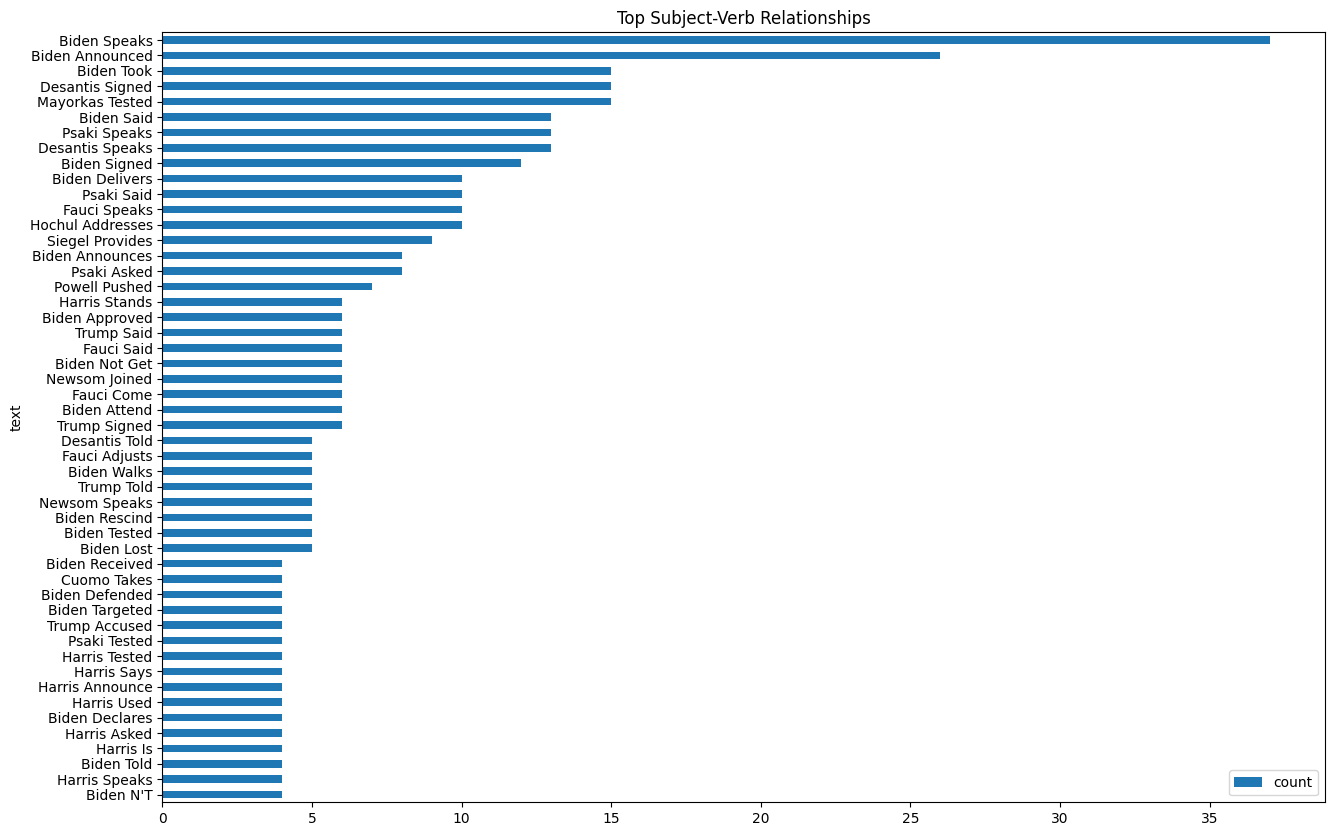

In [38]:
plt.rcParams['figure.figsize'] = [15, 10]

for_plotting.sort_values(by=['count'], inplace=True, ascending=False)

top_for_plotting = for_plotting[:50].copy()

top_for_plotting.sort_values(by=['count'], inplace=True, ascending=True)

top_for_plotting.plot.barh(x = 'text', y = 'count',
                       title = 'Top Subject-Verb Relationships')

BidenFor
BidenFor
BidenLessen
BidenGet
BidenGet
BidenGet
BidenGet
BidenGet
BidenGet
BidenIs
BidenIs
BidenBe
BidenBe
BidenFace
BidenFace
BidenWearing
BidendidDiscuss
BidendidDiscuss
BidenAllowing
BidenAddress
BidenAddress
BidenAddress
FauciNot
FauciWere
PsakiDeny
PsakiDeny
PsakiDeny
NewsomNotice
HarrisTrust
WalenskyVery
HarrisTrust


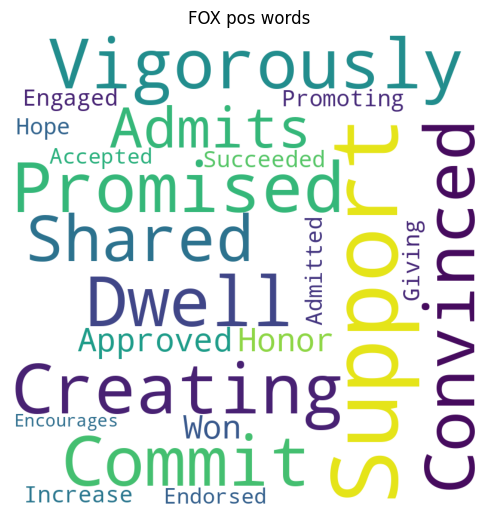

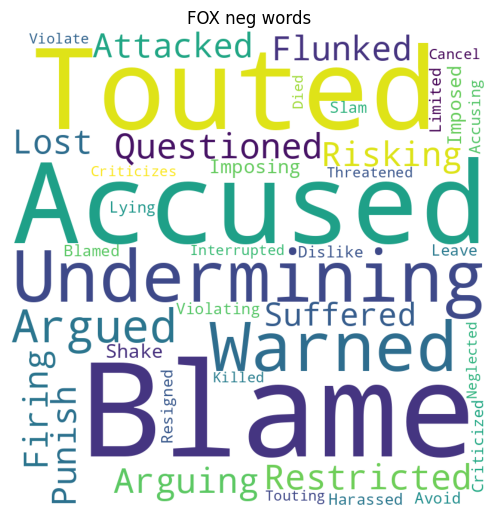

BidenSteps
BidenIn
CollinsAlso
CollinsNot


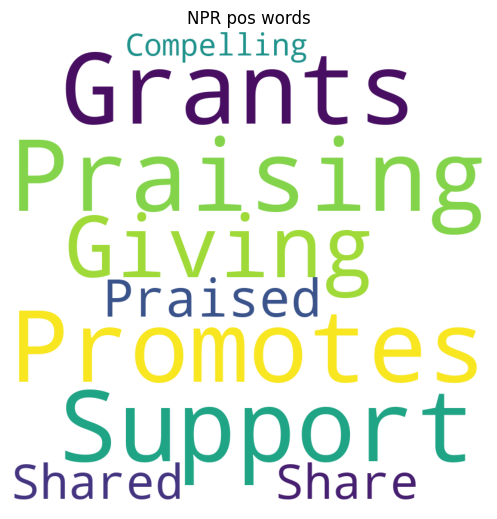

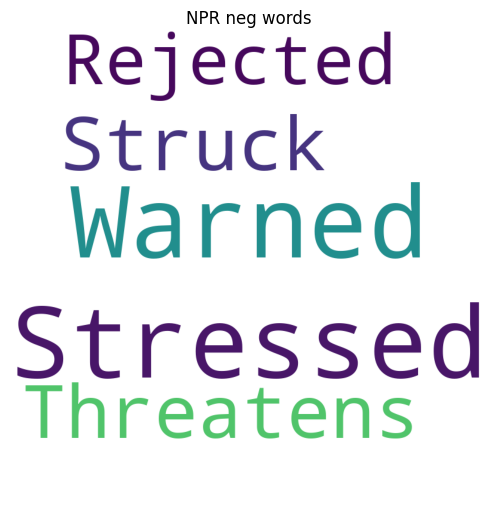

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
 
sent_types = ['pos', 'neg']

for news_source in news_sources:
    
    subject_verb_pairs = []
    for string in extracted_triples[news_source]:
        if not 'Not' in string:
            subject_verb_pairs.append(' '.join(string.split()[0:2]))
        else:
            subject_verb_pairs.append(' '.join(string.split()[0] + ' ' + string.split()[2]))

    subject_verb_count = count_words(subject_verb_pairs)

    for sent_type in sent_types:
        wc_words = ''
        for key, val in subject_verb_count.items():
            sentiment_tagged_words = vader_sentiment(key.split()[1])
    
            if sentiment_tagged_words[sent_type] == 1.0:
                wc_words += key.split()[1] + ' '
 
        wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        stopwords = stopwords,
                        min_font_size = 10).generate(wc_words)
 
        plt.figure(figsize = (5, 5), facecolor = None)
        plt.title(news_source + ' ' + sent_type + ' words')
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad = 0)
 
        plt.show()